# N2V Training

Here we train N2V on single noisy images. This allows us to create a pseudo-ground truth, which further allows estimation of the noise model in the notebooks ```1a_CreateNoiseModel_Calibration.ipynb``` or ```1b_CreateNoiseModel_Bootstrap.ipynb```. Use this (```1_N2VTraining.ipynb```) and ```2_N2VPrediction.ipynb``` if you wish to test the Bootstrap Mode or in case the calibration data is not available.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np

from ppn2v.unet.model import UNet
from ppn2v import utils, training

from tifffile import imread
# See if we can use a GPU
device=utils.getDevice()

CUDA available? True


### Download data
Download the data from  https://owncloud.mpi-cbg.de/index.php/s/lt3yecHQMKJnJlB/download. Here we show the pipeline for Mouse actin dataset. Save the dataset at an appropriate location. For us, the path is data folder which exists at `../../../`. For Mouse actin, the data to be denoised is named ```sample_attempt2.tif```. 

In [2]:
# Download data
import os
import urllib
import zipfile

if not os.path.isdir('../../../data/Mouse actin/'):
    os.mkdir('../../../data/Mouse actin/')

zipPath="../../../data/Mouse actin/Mouse_actin.zip"
if not os.path.exists(zipPath):  
    data = urllib.request.urlretrieve(' https://owncloud.mpi-cbg.de/index.php/s/lt3yecHQMKJnJlB/download', zipPath)
    with zipfile.ZipFile(zipPath, 'r') as zip_ref:
        zip_ref.extractall("../../../data/Mouse actin/")


### Load Data
#### Check ```filename``` and specify the ```dataName```  

In [3]:
path='../../../data/Mouse actin/'
fileName='sample_attempt2.tif'
dataName='mouseactin' # This will be used to name the noise2void model

Run the cells below

In [4]:
data=imread(path+fileName)
nameModel=dataName+'_n2v'

### Create the Network and Train it
This can take a while.
`numOfEpochs=200` and `stepsPerEpoch=10` gives best results for `Mouse actin` dataset.

In [5]:
# The N2V network requires only a single output unit per pixel
net = UNet(1, depth=3)

# Split training and validation data.
my_train_data=data[:-5].copy()
my_val_data=data[-5:].copy()

# Start training.
trainHist, valHist = training.trainNetwork(net=net, trainData=my_train_data, valData=my_val_data,
                                           postfix= nameModel, directory=path, noiseModel=None,
                                           device=device, numOfEpochs= 200, stepsPerEpoch=10, 
                                           virtualBatchSize=20, batchSize=1, learningRate=1e-3)

Epoch 0 finished      
avg. loss: 0.4628554701805115+-(2SEM)0.22978405331180385      
Epoch 1 finished      
avg. loss: 0.2449244514107704+-(2SEM)0.1141901119673188      
Epoch 2 finished      
avg. loss: 0.33448440097272397+-(2SEM)0.13035932778337095      
Epoch 3 finished      
avg. loss: 0.31357087306678294+-(2SEM)0.10880714717747      
Epoch 4 finished      
avg. loss: 0.35973361469805243+-(2SEM)0.1222827639999331      
Epoch 5 finished      
avg. loss: 0.3715075206011534+-(2SEM)0.1262535537479079      
Epoch 6 finished      
avg. loss: 0.30894990302622316+-(2SEM)0.09062571167623178      
Epoch 7 finished      
avg. loss: 0.16904327124357224+-(2SEM)0.03828506615357565      
Epoch 8 finished      
avg. loss: 0.29298149347305297+-(2SEM)0.09238990264688544      
Epoch 9 finished      
avg. loss: 0.3313834387809038+-(2SEM)0.09994258354202824      
Epoch 10 finished      
avg. loss: 0.3308157935738564+-(2SEM)0.13651809731922873      
Epoch 11 finished      
avg. loss: 0.3349075604230165

Epoch 90 finished      
avg. loss: 0.21108708307147026+-(2SEM)0.07227695239663745      
Epoch 91 finished      
avg. loss: 0.2677874244749546+-(2SEM)0.10057618356711884      
Epoch 92 finished      
avg. loss: 0.2678510002791882+-(2SEM)0.09428943145973066      
Epoch 93 finished      
avg. loss: 0.2318337857723236+-(2SEM)0.07346948415513606      
Epoch 94 finished      
avg. loss: 0.31969569995999336+-(2SEM)0.12804865189058443      
Epoch 95 finished      
avg. loss: 0.28673079088330267+-(2SEM)0.11937588046120946      
Epoch 96 finished      
avg. loss: 0.24574961923062802+-(2SEM)0.067014289403398      
Epoch 97 finished      
avg. loss: 0.37911414094269275+-(2SEM)0.13107638483815556      
Epoch 98 finished      
avg. loss: 0.21303001828491688+-(2SEM)0.060602402946165805      
Epoch    99: reducing learning rate of group 0 to 7.8125e-06.
Epoch 99 finished      
avg. loss: 0.28069787062704565+-(2SEM)0.09484588609251247      
Epoch 100 finished      
avg. loss: 0.2914875756949186+-(2SEM)

Epoch 180 finished      
avg. loss: 0.20988775342702864+-(2SEM)0.07375368546647763      
Epoch 181 finished      
avg. loss: 0.3017690826207399+-(2SEM)0.1235782415155034      
Epoch 182 finished      
avg. loss: 0.34753956086933613+-(2SEM)0.10195873202967157      
Epoch   183: reducing learning rate of group 0 to 2.4414e-07.
Epoch 183 finished      
avg. loss: 0.21494684033095837+-(2SEM)0.06890482961380047      
Epoch 184 finished      
avg. loss: 0.2814055562019348+-(2SEM)0.11285164033574167      
Epoch 185 finished      
avg. loss: 0.38408965766429903+-(2SEM)0.12694812338263325      
Epoch 186 finished      
avg. loss: 0.3106869626790285+-(2SEM)0.12522706959321905      
Epoch 187 finished      
avg. loss: 0.2307225052267313+-(2SEM)0.07548867640368238      
Epoch 188 finished      
avg. loss: 0.3027006063610315+-(2SEM)0.07527744116119614      
Epoch 189 finished      
avg. loss: 0.26599610708653926+-(2SEM)0.10631937715894263      
Epoch 190 finished      
avg. loss: 0.3542306367307901

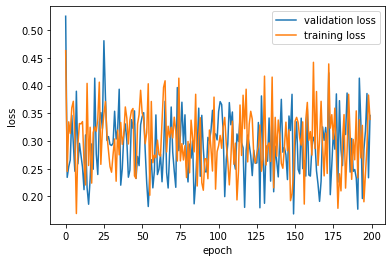

In [6]:
# Let's look at the training and validation loss
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(valHist, label='validation loss')
plt.plot(trainHist, label='training loss')
plt.legend()
plt.show()